## Analysis

Imports and initialization

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

### Table of contents

* [Imports and preprocessing](#imports)
* [Fluency/performance analysis](#fluency)
    * [Control analysis: performance differences](#fluency-control1)
    * [Control analysis: collective inhibition](#fluency-control2)
* [Flexibility](#jump-size)
* [Originality](#originality)

### Imports <a class="anchor" id="imports"></a>

In [2]:
PATH = 'animal_game/analyses/21_08_20'

In [3]:
data = pd.read_csv(f'{PATH}/processed.tsv.gz', 
                   sep='\t', compression='gzip')
aggs = pd.read_csv(f'{PATH}/aggregates.tsv', sep='\t')

### Summary
- Fluency:
    - Diversity can yield collective benefit in fluency, at least up to a certain point
    - This is especially true for pairs where performance differences between individuals are lower
    - However, diversity yields collective inhibition
- Flexibility:
    - Diversity also yields collective gain in flexibility (operationalized as jump size)
    - This seems to relate to performance and yield a performance advantage, at least up to a certain point
    - This may in turn be due to the fact that higher flexibility and diversity make it possible to explore peripheral animals, which remain unexplored in invidual trials
- Originality:
    - Diversity leads to more original behavior
    - Originality may be another driver of collective benefit

#### A bit of postprocessing

In [4]:
data.rename({'noise_level_a0': 'diversity_level'}, axis=1, inplace=True)
aggs.rename({'noise_level_a0': 'diversity_level'}, axis=1, inplace=True)

In [5]:
all_data = data.copy()
all_aggs = aggs.copy()
aggs = aggs[aggs['diversity_level']<=14]
data = data[data['diversity_level']<=14]

In [6]:
data['diversity_dodge'] = data['diversity_level'] + \
                          np.random.uniform(-.2,.2,size=data.shape[0])
aggs['diversity_dodge'] = aggs['diversity_level'] + \
                          np.random.uniform(-.2,.2,size=aggs.shape[0])

In [45]:
data['mean_neighborhood_density'] = (data['mean_neighborhood_density_0'] + \
                                     data['mean_neighborhood_density_1'])
data['peripherality'] = (240 - data['mean_neighborhood_density']) / 240
aggs = aggs.merge(data.groupby('pair')['peripherality'].mean().reset_index(), 
                  on='pair')

## Fluency/performance analysis <a class="anchor" id="fluency"></a>

First, let's investigate whether there is any collective benefit in fluency due to interaction, and how that depends on noise levels.

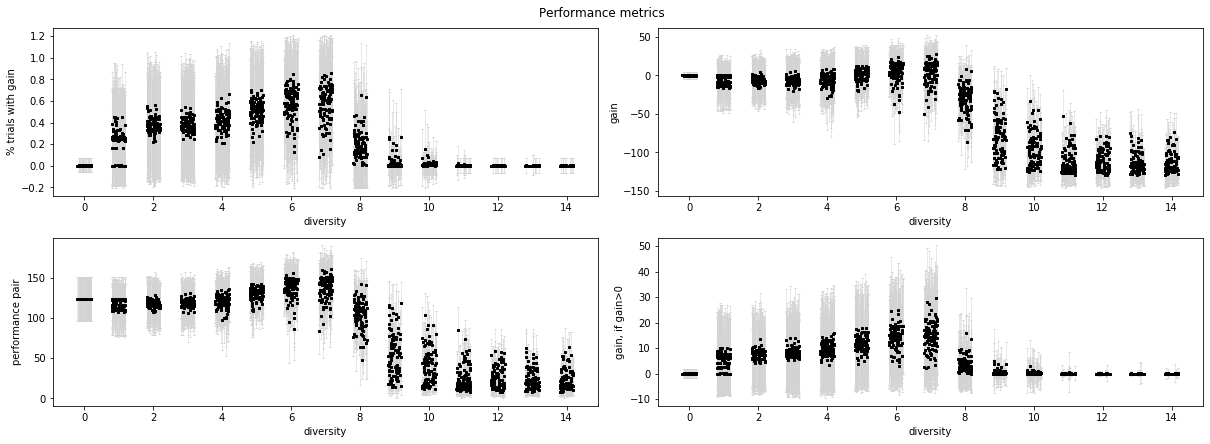

In [351]:
f, ax = plt.subplots(figsize=(17,6), nrows=2, ncols=2)
ax[0,0].errorbar(data=aggs,
                 x='diversity_dodge', 
                 y='is_gain_mean',
                 yerr='is_gain_std',
                 marker="s",
                 fmt='.k',
                 ecolor='lightgrey', 
                 elinewidth=.5, capsize=1, 
                 ms=2)
ax[0,0].set_xlabel('diversity')
ax[0,0].set_ylabel('% trials with gain')
ax[0,1].errorbar(data=aggs,
               x='diversity_dodge', 
               y='amount_gain_mean',
               yerr='amount_gain_std',
               marker="s",
               fmt='.k',
               ecolor='lightgrey', 
               elinewidth=.5, capsize=1, 
               ms=2)
ax[0,1].set_xlabel('diversity')
ax[0,1].set_ylabel('gain')
ax[1,0].errorbar(data=aggs,
               x='diversity_dodge', 
               y='performance_pair_mean',
               yerr='performance_pair_std',
               marker="s",
               fmt='.k',
               ecolor='lightgrey', 
               elinewidth=.5, capsize=1, 
               ms=2)
ax[1,0].set_xlabel('diversity')
ax[1,0].set_ylabel('performance pair')
ax[1,1].errorbar(data=aggs,
                 x='diversity_dodge', 
                 y='pos_gain_mean',
                 yerr='pos_gain_std',
                 marker="s",
                 fmt='.k',
                 ecolor='lightgrey', 
                 elinewidth=.5, capsize=1, 
                 ms=2)
ax[1,1].set_xlabel('diversity')
ax[1,1].set_ylabel('gain, if gain>0')
plt.suptitle('Performance metrics', y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

The plot below shows the distribution of trial-level performances by noise level.

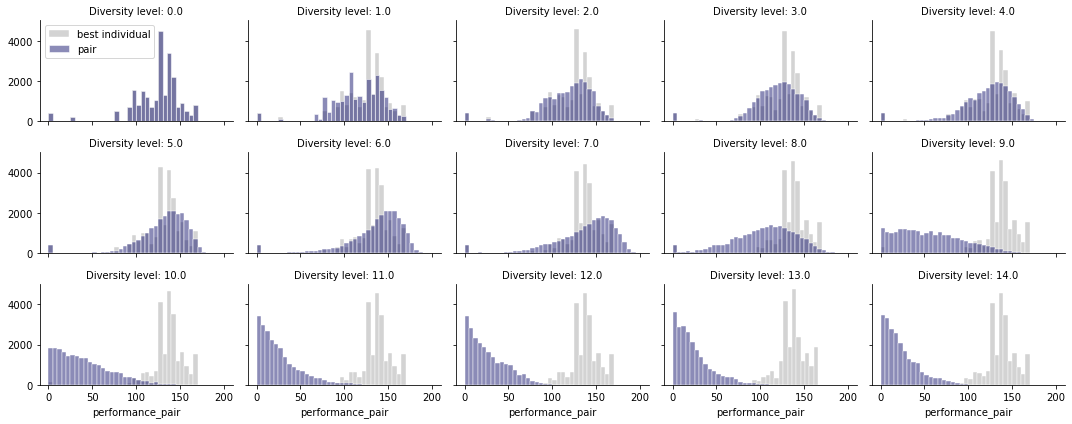

In [280]:
f = sns.FacetGrid(data=data, 
                  col='diversity_level', 
                  col_wrap=5,
                  height=2, 
                  aspect=1.5)
f.map(sns.histplot, 'performance_best', alpha=.5, 
      binwidth=5, edgecolor='white', color='darkgrey',
      label='best individual')
f.map(sns.histplot, 'performance_pair', alpha=.5, 
      color='midnightblue', 
      binwidth=5, edgecolor='white', 
      label='pair')
f.set_titles("Diversity level: {col_name}")
f.axes[0].legend()
plt.show()

### Fluency, control analysis: performance difference <a class="anchor" id="fluency-control1"></a>

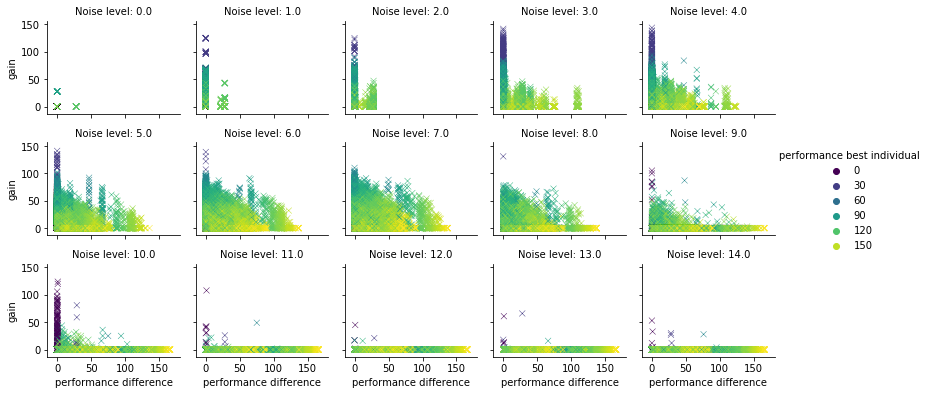

In [304]:
f = sns.relplot(data=data,
                x='performance_difference_individuals', 
                y='pos_gain',
                col='diversity_level', 
                col_wrap=5, 
                height=1.8, aspect=1.2, 
                marker='x', 
                color='grey', 
                hue='performance_best', 
                palette='viridis')
f.set_axis_labels('performance difference', 'gain')
f.set_titles('Noise level: {col_name}')
f._legend.set_title('performance best individual')
f._legend.set_bbox_to_anchor([1.06, 0.5]) 
plt.show()

### Fluency, control analysis: collective inhibition <a class="anchor" id="fluency-control2"></a>

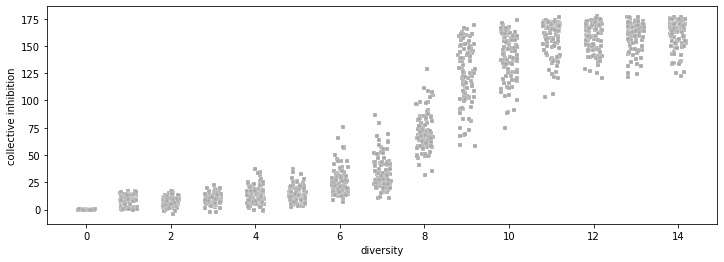

In [402]:
f, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(data=aggs,
                 x='diversity_dodge', 
                 y='collective_inhibition',
                 marker="s", 
                color='darkgrey',
                 s=10)
plt.xlabel('diversity')
plt.ylabel('collective inhibition')
plt.show()

## Flexibility <a class="anchor" id="flexibility"></a>

Relationship between jumps and performance across noise levels, pair-level estimates.

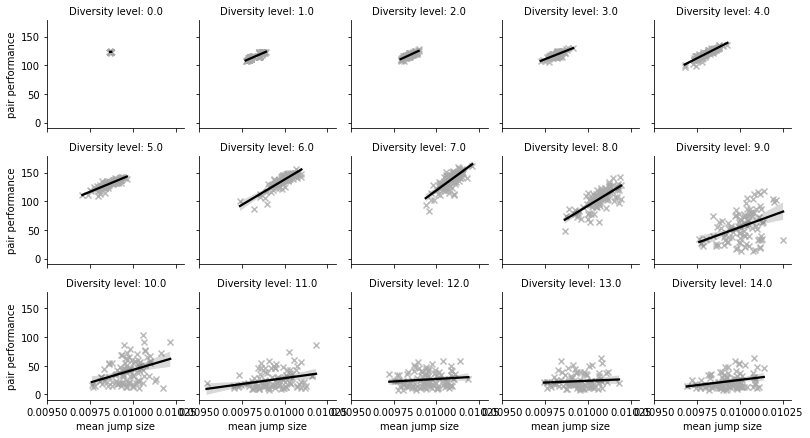

In [309]:
f = sns.lmplot(data=aggs,
               col='diversity_level', 
               x='mean_jump_speaker',
               y='performance_pair_mean',  
               col_wrap=5, 
               height=2,
               aspect=1.1, 
               markers='x',
               scatter_kws={'color': 'darkgrey'},
               line_kws={'color': 'black'})
f.set_titles("Diversity level: {col_name}")
f.set_xlabels("mean jump size")
f.set_ylabels("pair performance")
for a in f.axes:
    a.set_xlim(0.0095,0.0103)
    a.set_xlabel
plt.show()

Relationship between jumps, performance and neighborhood density.

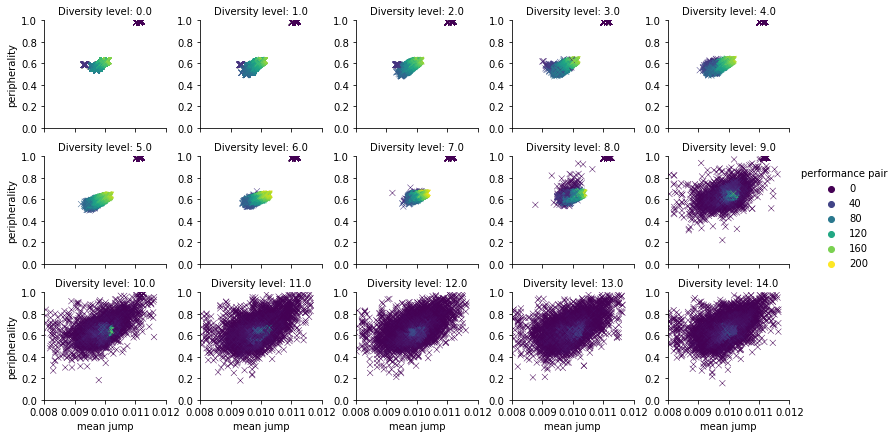

In [19]:
f = sns.relplot(data=data,
                col='diversity_level', 
                x='mean_jump_speaker',
                y='peripherality', 
                hue='performance_pair',
                palette='viridis',
                col_wrap=5, 
                height=2,
                aspect=1.1, 
                marker='x',
                color='darkgrey', 
                facet_kws={'sharey': False})
f.set_titles("Diversity level: {col_name}")
f.set_xlabels("mean jump")
f.set_ylabels("peripherality")
f._legend.set_title('performance pair')
for a in f.axes:
    a.set_xlim(0.008, 0.012)
    a.set_ylim(0.0, 1.0)
plt.show()

Same plot as above, but displaying aggregates by pair.

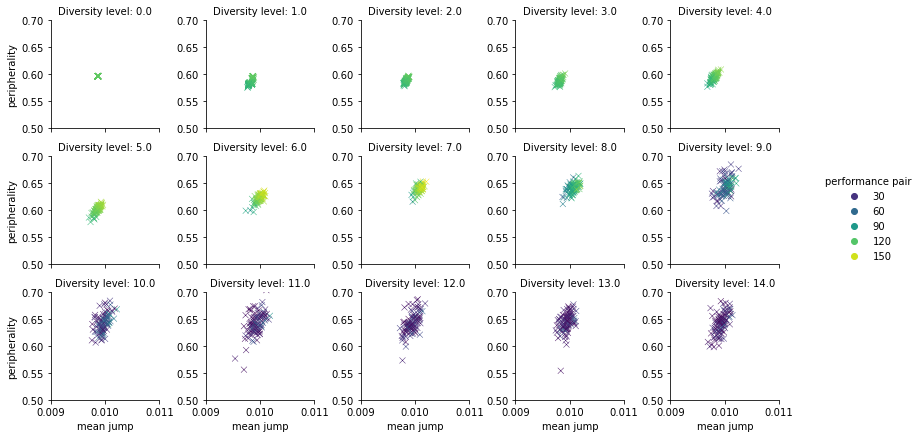

In [52]:
f = sns.relplot(data=aggs,
                col='diversity_level', 
                x='mean_jump_speaker',
                y='peripherality', 
                hue='performance_pair_mean',
                palette='viridis',
                col_wrap=5, 
                height=2,
                aspect=1.1, 
                marker='x',
                color='darkgrey', 
                facet_kws={'sharey': False})
f.set_titles("Diversity level: {col_name}")
f.set_xlabels("mean jump")
f.set_ylabels("peripherality")
f._legend.set_title('performance pair')
for a in f.axes:
    a.set_xlim(0.009, 0.011)
    a.set_ylim(0.5, 0.7)
plt.show()

## Originality <a class="anchor" id="originality"></a>

Originality, diversity and performance

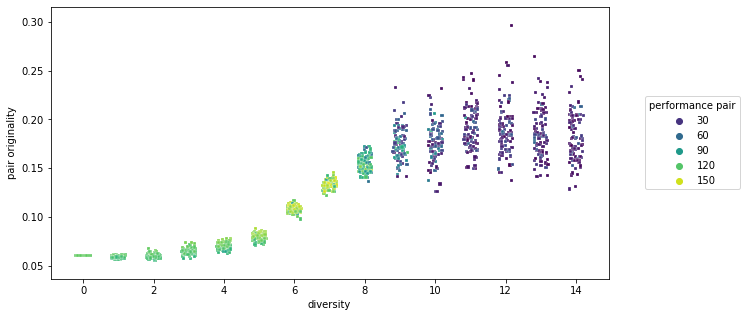

In [403]:
f, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=aggs,
                 x='diversity_dodge', 
                 y='orig_pair',
                 marker="s",
                 hue='performance_pair_mean',
                 palette='viridis',
                 s=10)
plt.xlabel('diversity')
plt.ylabel('pair originality')
plt.legend(title='performance pair', bbox_to_anchor=[1.15,.5], loc='center')
plt.show()

Difference in originality and likelihood of gain

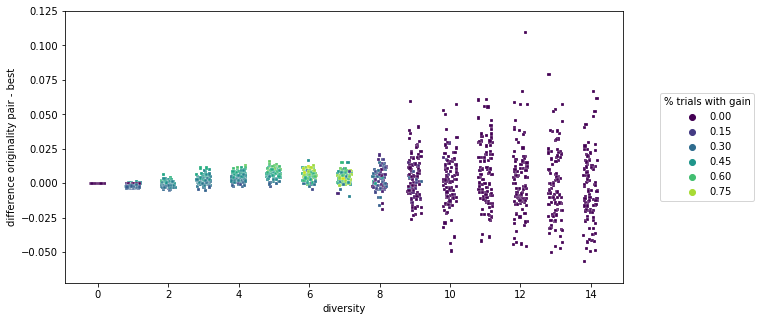

In [404]:
f, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=aggs,
                x='diversity_dodge', 
                y='orig_best_difference',
                marker="s",
                hue='is_gain_mean',
                palette='viridis',
                s=10)
plt.xlabel('diversity')
plt.ylabel('difference originality pair - best')
plt.legend(title='% trials with gain', bbox_to_anchor=[1.15,.5], loc='center') 
plt.show()